In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import floor
from pathlib import Path
import json

__rows = 1
__cols = 1


def sb_init( cols, rows):
    fig = plt.figure(figsize=[cols*5, rows*4])
    global __rows
    global __cols
    __rows = rows
    __cols = cols
    plt.subplot(rows, cols, 1)
    return fig


def sb(x, y):
    return plt.subplot(__rows, __cols, x + (y - 1) * __cols)


In [4]:
# Load data

p = Path('./')
dirs = [f for f in p.iterdir() if f.is_dir()]
data = []

for d in dirs:
    item = {}
    item.update( json.loads( (d / 'details.txt')   .read_text() ) )
    temp = (d / 'deposition.txt')   .read_text()
    temp = temp.replace("nan","0")
    item.update( json.loads( temp ) )
    data.append(item)

In [5]:
data[0]

{'side': 64,
 'defects_frac': 0.2,
 'gamma': 0.2,
 'replies': 100,
 'corr_range': -1,
 'dep_polymers': 'Dimers',
 'occupation_average': 2767.52,
 'occupation_std': 16.4805,
 'occupation_fraction_average': 0.675664,
 'occupation_fraction_std': 0.00402355}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


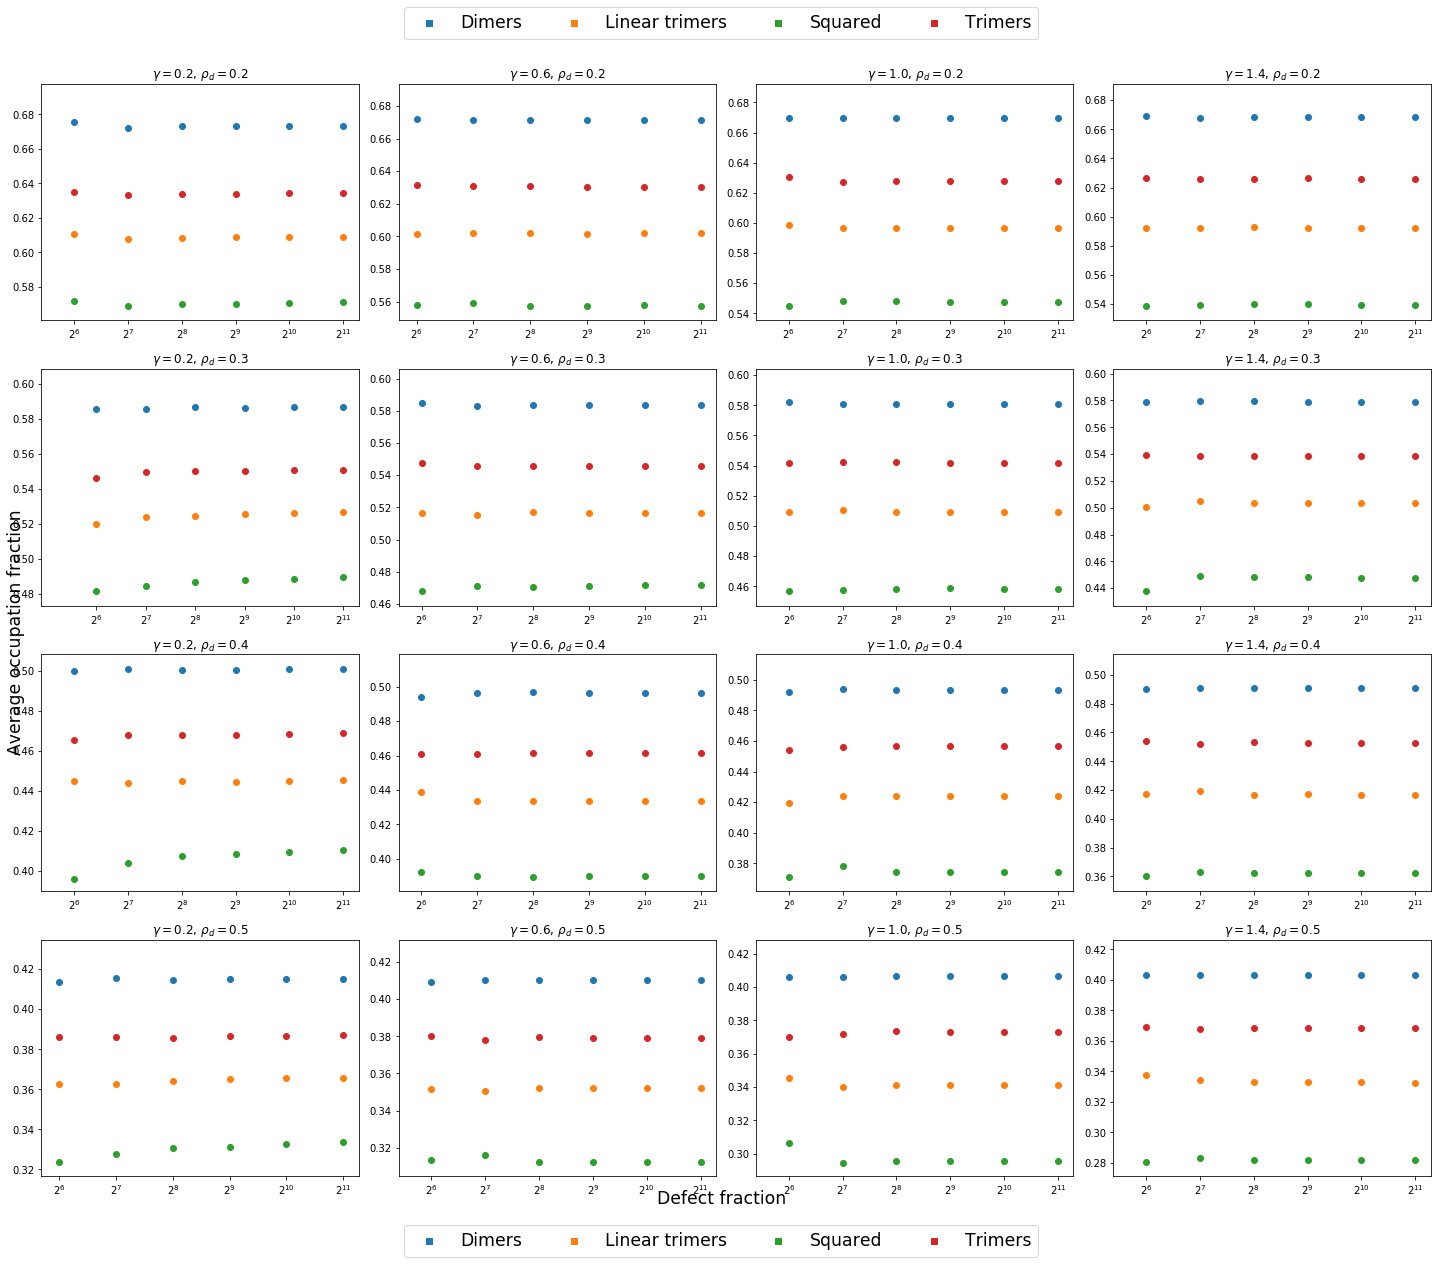

In [51]:
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
marker_list = ['+','x','*','o']

gammas = np.unique( [i['gamma'] for i in data] ).tolist()
polys = np.unique( [i['dep_polymers'] for i in data] ).tolist()
fracs = np.unique( [i['defects_frac'] for i in data] ).tolist()
sizes = np.unique( [i['side'] for i in data] ).tolist()

fig = sb_init( len( gammas ), len( fracs ) )

for i_g, g in enumerate( gammas ):
    for i_f, f in enumerate( fracs ):
        axes = sb( i_g+1, i_f+1 )
        current = [ v for v in data if v['gamma'] == g and v['defects_frac'] == f ]
        for cc in current:
            plt.scatter( cc['side'], cc['occupation_fraction_average'],
                c= color_list[ polys.index( cc['dep_polymers'] ) ] )
        plt.xscale( 'log', basex=2 )
        plt.xticks( sizes )
        plt.title(r"$\gamma = $" + str(g) + r", $\rho_d = $" + str(f) )

fig.text(0.5, 0.004, 'Defect fraction', ha='center', fontsize='xx-large')
fig.text(0.004, 0.5, 'Average occupation fraction', va='center', rotation='vertical',fontsize='xx-large')

for p in polys:
    plt.scatter( [], [], c= color_list[ polys.index( p ) ], marker= 's', label=p )
h, l = axes.get_legend_handles_labels()
fig.legend(  h, l, loc = 'upper center', bbox_to_anchor=(0.5, 1.05), bbox_transform=plt.gcf().transFigure, ncol=len(h), fontsize='xx-large' )
fig.legend(  h, l, loc = 'lower center', bbox_to_anchor=(0.5, -0.05), bbox_transform=plt.gcf().transFigure, ncol=len(h), fontsize='xx-large' )
plt.tight_layout()

plt.savefig('size_scan.png', bbox_inches='tight')
plt.savefig('size_scan.pdf', bbox_inches='tight')